In [47]:
#import scripting
import sys
sys.path.insert(0, "../build")
from scripting import *

import beadquality as bq
#import pandas as pd

[autoreload of beadquality failed: Traceback (most recent call last):
  File "/home/sandra/miniconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 246, in check
    superreload(m, reload, self.old_objects)
  File "/home/sandra/miniconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 369, in superreload
    module = reload(module)
  File "/home/sandra/miniconda3/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/home/sandra/miniconda3/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 674, in exec_module
  File "<frozen importlib._bootstrap_external>", line 781, in get_code
  File "<frozen importlib._bootstrap_external>", line 741, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/home/sandra/tracka

In [2]:
#Load the track, put the path of the track file
#track = Track("/media/sandra/sirius/Andreas/ssHP6_Sequencing_20171220/AGC_1nM/Test_022_043_AGC_1nM_OR3_20nM_ssHP6_FOV1.trk") #, match=".*_043_(\w\w\w)_.*")
track = Track("../../Documents/local_test_data/tests/ssHP6_Sequencing_20171220/AGC_3nM/Test_022_043_AGC_3nM_OR3_20nM_ssHP6_FOV1.trk")
#track = Track("/media/sandra/sirius/Andreas/ssHP6_Sequencing_20171220/AGC_1nM/Test_022_043_AGC_1nM_OR3_20nM_ssHP6_FOV1.trk")

In [3]:
track.key = 'AGC'

In [4]:
#Load the tracks, put the path of the data folder
#We can load .trk or .pk
#tracks = TracksDict("../../Documents/local_test_data/ssHP6_Sequencing_20171220//*.pk")
tracks = TracksDict("../../Documents/local_test_data/tests/ssHP6_Sequencing_20171220/*/*.trk", match=".*_043_(\w\w\w)_.*")


#the chronological order can be extracted from the .trk files
tracks_original = TracksDict("/media/sandra/sirius/Andreas/ssHP6_Sequencing_20171220/*/*.trk", match=".*_043_(\w\w\w)_.*")

In [5]:
resume = bq.resumeTracksQuality(tracks)

In [6]:
resume_single= bq.resumeTracksQuality(track)


In [7]:
resume

,Good,Bad,Total
Track,,,
GCA,39,70,109
GTG,42,67,109
GGA,45,64,109
CGT,50,59,109
CAG,52,57,109
TGA,28,81,109
GGT,42,67,109
OR3,61,48,109
GAG,48,61,109


In [8]:
df_dfGoodBadBeads = bq.dfGoodBadBeads(tracks)

In [9]:
df_dfGoodBadBeads_single = bq.dfGoodBadBeads(track)

In [10]:
#Assign variables order for tracks and beads
order_tracks_best_single = [str(track.key)]
order_tracks_chrono_single = list(df_dfGoodBadBeads_single.set_index('bead').columns.values)

order_tracks_chrono = list(tracks_original.dataframe().set_index('key').sort_values(by='modification').index.values)
order_tracks_best = list(df_dfGoodBadBeads.set_index('bead').columns.values)

order_beads_normal_single = list(track.beadsonly.keys()) 
order_beads_best_single = list(df_dfGoodBadBeads_single['bead'].values)

order_beads_normal = tracks.availablebeads()
order_beads_best = list(df_dfGoodBadBeads['bead'].values)

In [11]:
df_resumeBeadsQuality_single = bq.resumeBeadsQuality(track)

In [12]:
df_typeError_single = bq.typeError(df_resumeBeadsQuality_single,order_beads_best_single,order_tracks_chrono_single)


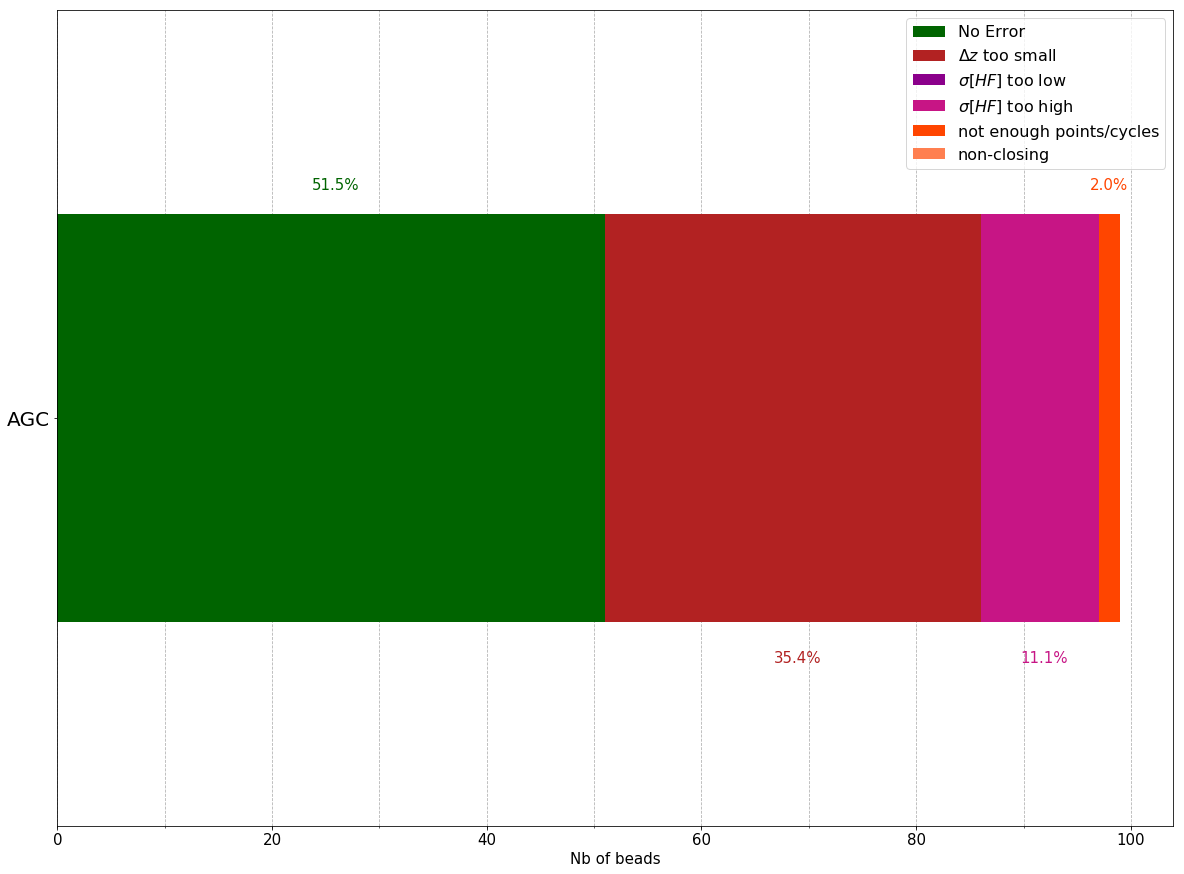

In [39]:
bq.barBeadsByType(df_typeError_single,order_tracks_chrono_single)
plt.show()

In [42]:
dfmsg_single= bq.dfCleaningMessages(track,order_beads_normal_single)